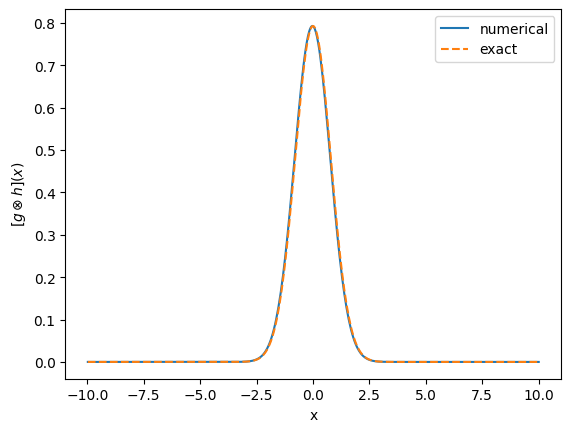

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def function_g(x):
    return np.exp(-x**2)

def function_h(x):
    return np.exp(-4*x**2)

xmin_value = -5
xmax_value = 5
num_points = 200
delta_x = (xmax_value - xmin_value) / (num_points - 1)

x_values, sample_g_values, sample_h_values = [], [], []
for i in range(num_points):
    sample_g_values.append(function_g(xmin_value + i * delta_x))
    sample_h_values.append(function_h(xmin_value + i * delta_x))
    x_values.append(xmin_value + i * delta_x)

xmin_value = x_values[0]
xmax_value = x_values[-1]
for i in range(num_points):
    sample_g_values.append(0)
    sample_h_values.append(0)
    if i < num_points / 2:
        x_values.append(xmin_value - i * delta_x)
    else:
        x_values.append(i * delta_x)

x_values.sort()

dft_g_result = np.fft.fft(sample_g_values, norm='ortho')
dft_h_result = np.fft.fft(sample_h_values, norm='ortho')

product_result = []
for i in range(2 * num_points):
    product_result.append(dft_g_result[i] * dft_h_result[i])

convolution_result = delta_x * (2 * num_points) ** 0.5 * np.fft.ifft(product_result, norm='ortho')

def exact_solution(x):
    return (np.pi / 5) ** 0.5 * np.exp(-4 * x**2 / 5)

exact_solution_values = []
for i in range(len(x_values)):
    exact_solution_values.append(exact_solution(x_values[i]))

plt.plot(x_values, convolution_result, label='numerical')
plt.plot(x_values, exact_solution_values, '--', label='exact')
plt.xlabel('x')
plt.ylabel(r'$[g \otimes h](x)$')
plt.legend()
plt.show()
